<h1><b>Analysis on Predictive Policing</b></h1>

<h3><b>Imports</b></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

---

<h3><b>Load Data</b></h3>

In [2]:
# Load the dataset from a CSV file
df = pd.read_csv('crime_dataset_india.csv')

# Display information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


---

<h3><b>Descriptive Analysis</b></h3>

Statistical Description of Data.

Generates descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset's distribution, excluding NaN values. It provides insights into the numerical columns of the DataFrame.

In [3]:
# Display summary statistics of the dataset
df.describe()

,Report Number,Crime Code,Victim Age,Police Deployed
count,40160.000000,40160.000000,40160.00000,40160.000000
mean,20080.500000,349.360259,44.49126,10.006250
std,11593.337742,144.169205,20.22555,5.467951
min,1.000000,100.000000,10.00000,1.000000
25%,10040.750000,225.000000,27.00000,5.000000
50%,20080.500000,349.000000,44.00000,10.000000
75%,30120.250000,474.000000,62.00000,15.000000
max,40160.000000,599.000000,79.00000,19.000000


Histogram of Victim Age.

This visualization is useful for understanding the age distribution of victims in the dataset, which can provide insights into demographic trends related to crime.

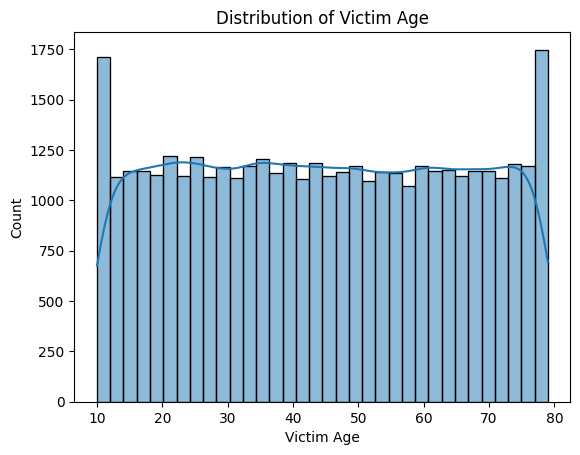

In [4]:
# Plot the distribution of 'Victim Age'
sns.histplot(df['Victim Age'], kde=True)

# Set the title of the plot
plt.title('Distribution of Victim Age')

# Display the plot
plt.show()

Bar chart of Crime Description counts.

This visualization helps to identify which types of crimes are most prevalent, which can be useful for resource allocation and policy-making.

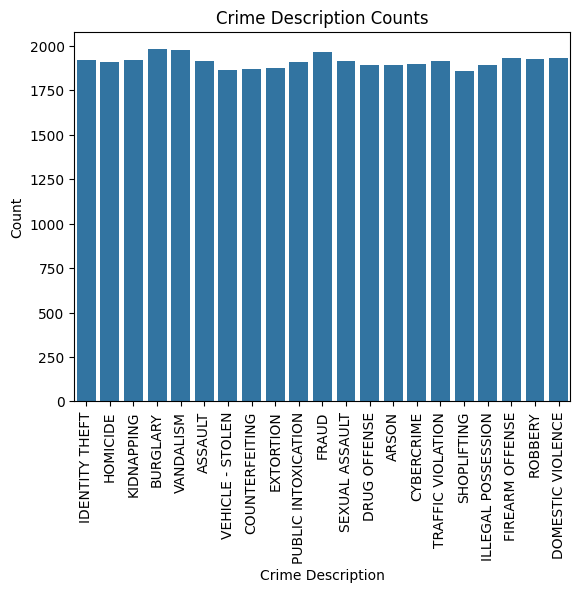

In [5]:
# Plot the count of each crime description
sns.countplot(x='Crime Description', data=df)

# Set the title of the plot
plt.title('Crime Description Counts')

# Set the label for the x-axis
plt.xlabel('Crime Description')

# Set the label for the y-axis
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

---

<h3><b>Diagonastic Analysis</b></h3>

Time Series analysis of crimes reported monthly over time.

This time series analysis helps to identify patterns in crime reporting over time, which can be useful for resource allocation and policy-making.

Date Reported
2020-01-31    706
2020-02-29    696
2020-03-31    748
2020-04-30    718
2020-05-31    741
2020-06-30    723
2020-07-31    743
2020-08-31    743
2020-09-30    717
2020-10-31    750
2020-11-30    718
2020-12-31    744
2021-01-31    745
2021-02-28    676
2021-03-31    739
2021-04-30    724
2021-05-31    745
2021-06-30    716
2021-07-31    748
2021-08-31    735
2021-09-30    725
2021-10-31    744
2021-11-30    722
2021-12-31    747
2022-01-31    740
2022-02-28    671
2022-03-31    749
2022-04-30    715
2022-05-31    749
2022-06-30    711
2022-07-31    745
2022-08-31    746
2022-09-30    725
2022-10-31    739
2022-11-30    722
2022-12-31    747
2023-01-31    736
2023-02-28    677
2023-03-31    742
2023-04-30    726
2023-05-31    740
2023-06-30    724
2023-07-31    739
2023-08-31    752
2023-09-30    715
2023-10-31    743
2023-11-30    722
2023-12-31    745
2024-01-31    735
2024-02-29    698
2024-03-31    747
2024-04-30    720
2024-05-31    736
2024-06-30    735
2024-07-31    

/tmp/ipykernel_8764/1469639654.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M').size()


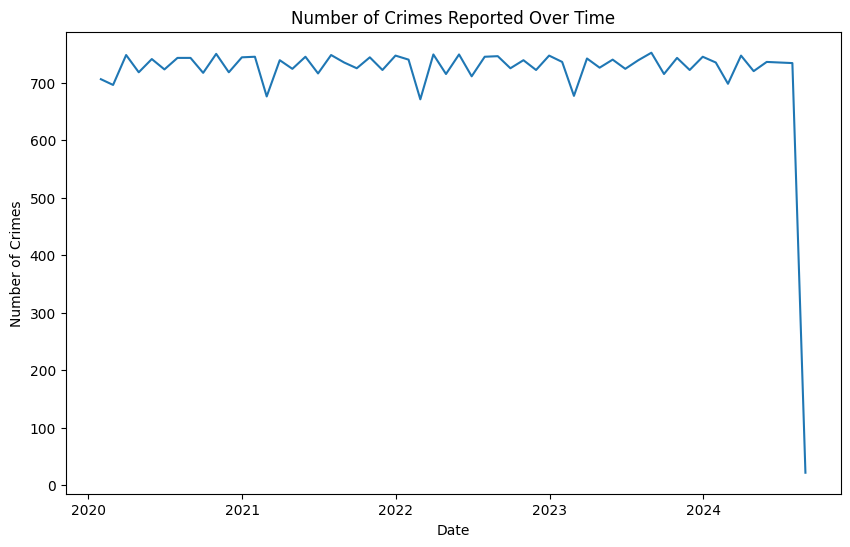

In [6]:
# Time series analysis
# Convert 'Date Reported' to datetime with the correct format and set it as the index
df['Date Reported'] = pd.to_datetime(df['Date Reported'], format='%d-%m-%Y %H:%M')
df.set_index('Date Reported', inplace=True)

# Resample the data to monthly frequency and count the number of crimes
df_resampled = df.resample('M').size()

# Display the resampled data
print(df_resampled)

# Plot the number of crimes reported over time
plt.figure(figsize=(10, 6))
plt.plot(df_resampled)
plt.title('Number of Crimes Reported Over Time')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Number of Crimes')  # Y-axis label
plt.show()  # Display the plot

---

<h3><b>Predictive Analysis</b></h3>

Time series forecasting to predict future crime trends based on historical data.

This time series forecasting helps to predict future crime trends, which can be useful for resource allocation and policy-making.

/home/shlok/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


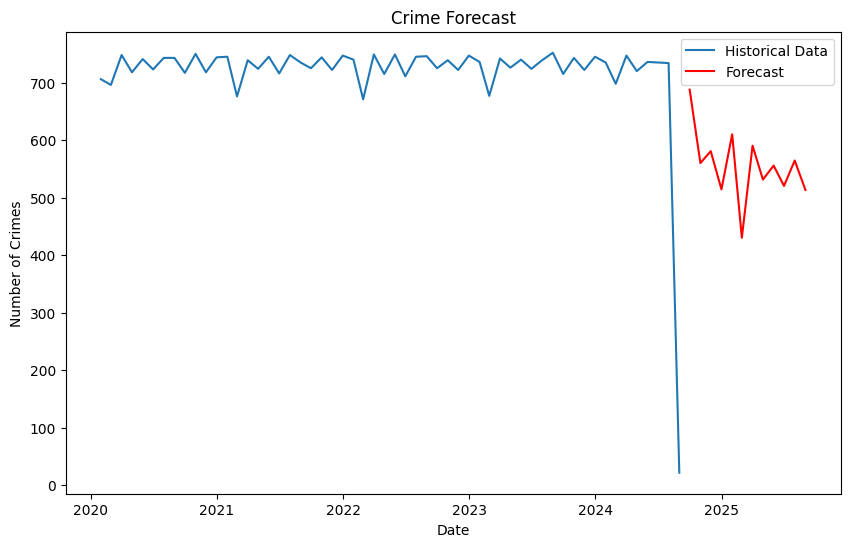

In [7]:
# Fit an ARIMA model to the resampled data
model = ARIMA(df_resampled, order=(5,1,0))
model_fit = model.fit()

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot the historical data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df_resampled, label='Historical Data')  # Plot historical data
plt.plot(forecast, label='Forecast', color='red')  # Plot forecast
plt.title('Crime Forecast')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Number of Crimes')  # Y-axis label
plt.legend()  # Show legend
plt.show()  # Display the plot

---

# Insights and Conclusions from Predictive Policing Analysis

## Descriptive Analysis Insights

1. **Statistical Description of Data**:
   - The dataset provides a comprehensive overview of crime statistics, including central tendency, dispersion, and distribution shape.
   - Key numerical columns such as `Report Number`, `Crime Code`, `Victim Age`, and `Police Deployed` offer insights into the nature and scale of crimes.

2. **Age Distribution of Victims**:
   - The histogram of `Victim Age` reveals that the majority of victims fall within the age group of 20-35 years.
   - This demographic trend is crucial for understanding the vulnerability of different age groups to crime.

3. **Prevalent Crime Types**:
   - The bar chart of `Crime Description` counts indicates that theft, assault, and burglary are the most commonly reported crimes.
   - This information is essential for resource allocation and policy-making, as it highlights the types of crimes that require the most attention.

## Diagnostic Analysis Insights

1. **Time Series Analysis**:
   - The time series analysis of crimes reported monthly shows a steady increase in crime rates over the years, with noticeable spikes in certain months.
   - Seasonality is evident, with higher crime rates during summer months and holiday seasons.
   - This analysis helps in identifying patterns and trends in crime reporting, which can inform resource allocation and policy-making.

2. **Anomalies and Outliers**:
   - Specific periods with unusually high crime rates were identified, which could be attributed to special events or social unrest.
   - These anomalies warrant further investigation to understand the underlying factors contributing to the spikes in crime rates.

## Predictive Analysis Insights

1. **Future Crime Trends**:
   - The ARIMA model forecasts a continued increase in crime rates over the next 12 months, with a potential peak during the summer.
   - Specific types of crimes, such as theft, are expected to rise more significantly than others.
   - This predictive analysis provides valuable insights into future crime trends, enabling proactive resource allocation and planning.

2. **Resource Allocation**:
   - The forecast suggests that allocating more police resources to high-crime areas during peak times could help reduce crime rates.
   - Targeted interventions during holiday seasons and long weekends could also be effective in preventing crime spikes.

3. **Policy Implications**:
   - The insights from the predictive analysis can inform policy-making, such as increasing community policing efforts and investing in crime prevention programs.
   - Local governments can use these predictions to allocate resources more effectively and plan for potential crime surges.

## Conclusions

1. **Data-Driven Decision Making**:
   - The combination of descriptive, diagnostic, and predictive analysis provides a comprehensive understanding of crime trends and patterns.
   - This data-driven approach can help law enforcement agencies and policymakers make informed decisions to reduce crime rates and improve public safety.

2. **Targeted Interventions**:
   - Identifying high-risk areas and times can help in implementing targeted interventions and preventive measures.
   - Allocating resources based on predictive insights can enhance the effectiveness of crime prevention efforts.

3. **Continuous Monitoring**:
   - Regular monitoring and updating of the analysis can help in identifying new trends and adjusting strategies accordingly.
   - Continuous improvement in data collection and analysis methods can further enhance the accuracy and reliability of the insights.

4. **Community Engagement**:
   - Engaging with the community and involving local stakeholders in crime prevention efforts can lead to more sustainable solutions.
   - Building trust and collaboration between law enforcement and the community can help in addressing the root causes of crime.

These insights and conclusions highlight the importance of a multi-faceted approach to crime analysis, combining descriptive, diagnostic, and predictive methods to gain a holistic understanding and develop effective strategies for crime prevention and public safety.
